In [2]:
%matplotlib inline
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import jax.numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from astropy.cosmology import Planck15 as cosmo
from astropy.table import Table
# from archivalCGMtools.loc4 import slime
from scipy import interpolate
#from goodies import closest
from mpl_toolkits import mplot3d
from astropy import stats as astats
%matplotlib inline
import pickle

from pyslime import slime
from pyslime import utils as psu

In [4]:
mapping_data_pickle_file = "/Users/mwilde/python/pyslime/pyslime/pipeline/data/mapping_BP_z0p0_1sigma.pick"
smpackage = pickle.load(open(mapping_data_pickle_file,'rb'))

In [5]:
smrhobins = smpackage['smrhobins']
binsize = 0.1
midbins = 0.5*smrhobins[:-1]+ 0.5*smrhobins[1:]

# The first and last bins have 0 counts, don't include them

In [6]:
nonan = ~np.isnan(smpackage['medvals_bp'])

In [7]:
from scipy.interpolate import InterpolatedUnivariateSpline

mapfunc = InterpolatedUnivariateSpline(midbins[nonan], smpackage['medvals_bp'][nonan], k=1)

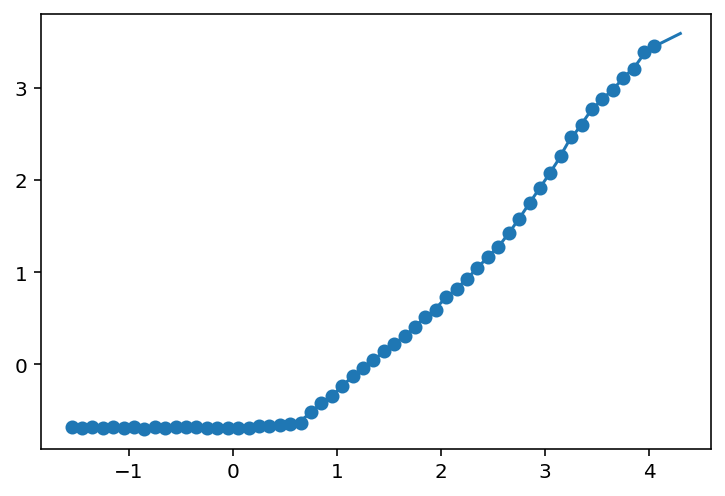

In [8]:
xfull = np.linspace(-1, 4.3)
plt.plot(xfull, mapfunc(xfull), label='spline')
# plt.plot(midbins, terpSlimeBp(midbins), label='interp')
plt.scatter(midbins, smpackage['medvals_bp'])

In [9]:
# check that this mapping gets something reasonable for a coma like density
# this number comes from the standardize_sdss notebook/rerouting-to-data notebook
3.96
mapfunc(3.6)

array(2.93257525)

In [10]:
# save the mapfunc
pickle.dump(mapfunc, open( "/Users/mwilde/python/pyslime/pyslime/pipeline/data/mapfunc_z0p0.pickle", "wb" ))

# below, I am investigating using linear fit but the above mapping seams to work well. 

In [16]:
from scipy import stats

cutidxlow = -12
cutidxhi = -3

cut = (midbins>=midbins[cutidxlow]) & (midbins<=midbins[cutidxhi])
x = midbins[cut]
y = smpackage['medvals_bp'][cut]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [10]:
coma_dens = 3.538825
coma_dens, slope*coma_dens + intercept

(3.538825, 2.8264361394011397)

In [18]:
mapfunc(3.53)

array(2.84366695)

In [20]:
mapfunc(3.4574211329533497)

array(2.7562127)

In [21]:
10**2.67838699

476.85571289667365